In [23]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Function to load and concatenate CSV files from a folder

In [41]:
import os
import pandas as pd

def load_csv_files(folder_path):
    dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            label = file_name.split(".")[0]  # Use the file name (without extension) as the label
            df = pd.read_csv(os.path.join(folder_path, file_name))
            df['label'] = label  # Add a label column
            dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

# Load your data
folder_path = 'data'
data = load_csv_files(folder_path)

# Inspect the first few rows of the dataset
data.head()


,Timestamp,Flex1,Flex2,Flex3,Flex4,Flex5,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,label
0,2024-12-25 18:47:59,790,792,805,778,772,-1.45,1.88,10.64,-0.57,1.21,0.41,a
1,2024-12-25 18:47:59,784,784,793,774,771,-3.19,1.33,10.11,0.29,1.10,-0.05,a
2,2024-12-25 18:47:59,775,777,785,767,769,-3.21,2.02,9.56,0.04,0.30,0.08,a
3,2024-12-25 18:47:59,772,775,782,767,767,-3.26,1.76,9.42,-0.68,0.11,0.32,a
4,2024-12-25 18:47:59,776,776,785,769,768,-3.88,1.29,9.48,-0.03,-0.19,-0.07,a


In [46]:
# Count the number of unique labels (gestures)
gesture_labels = data['label'].value_counts()
print(gesture_labels)
# Get the number of rows and columns
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")




label
Yes           1286
No             973
I_Love_You     896
Hello          895
deaf           825
f              800
c              797
e              700
Now            699
Awkward        694
Sorry          673
d              667
Goodbye        664
a              662
b              653
Name: count, dtype: int64
Number of samples: 11884
Number of features: 13


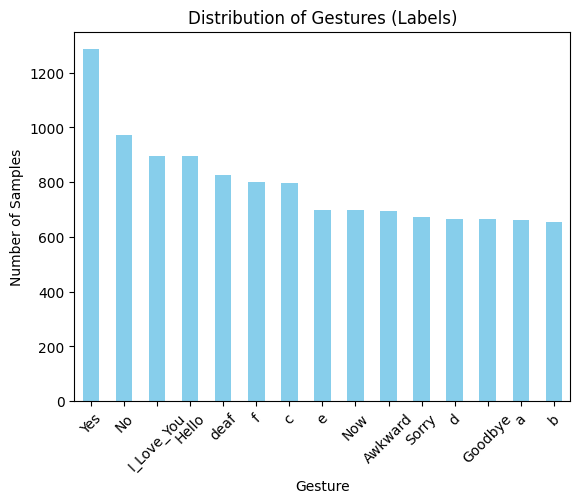

In [47]:
import matplotlib.pyplot as plt

# Plot the class distribution
gesture_labels.plot(kind='bar', color='skyblue')
plt.title('Distribution of Gestures (Labels)')
plt.xlabel('Gesture')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


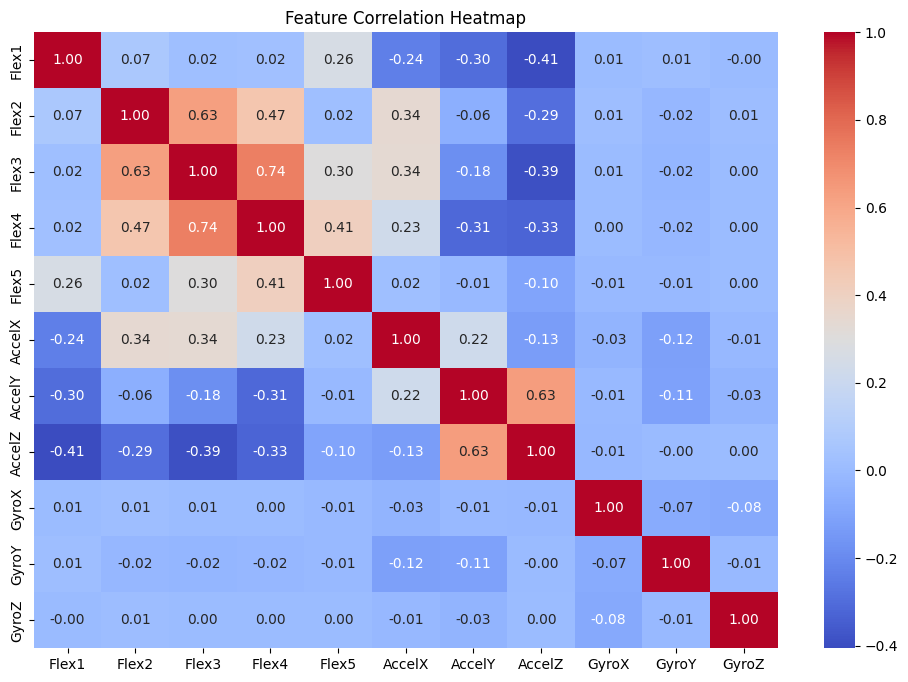

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like 'label' and any timestamp columns)
numeric_data = data.select_dtypes(include=[float, int])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

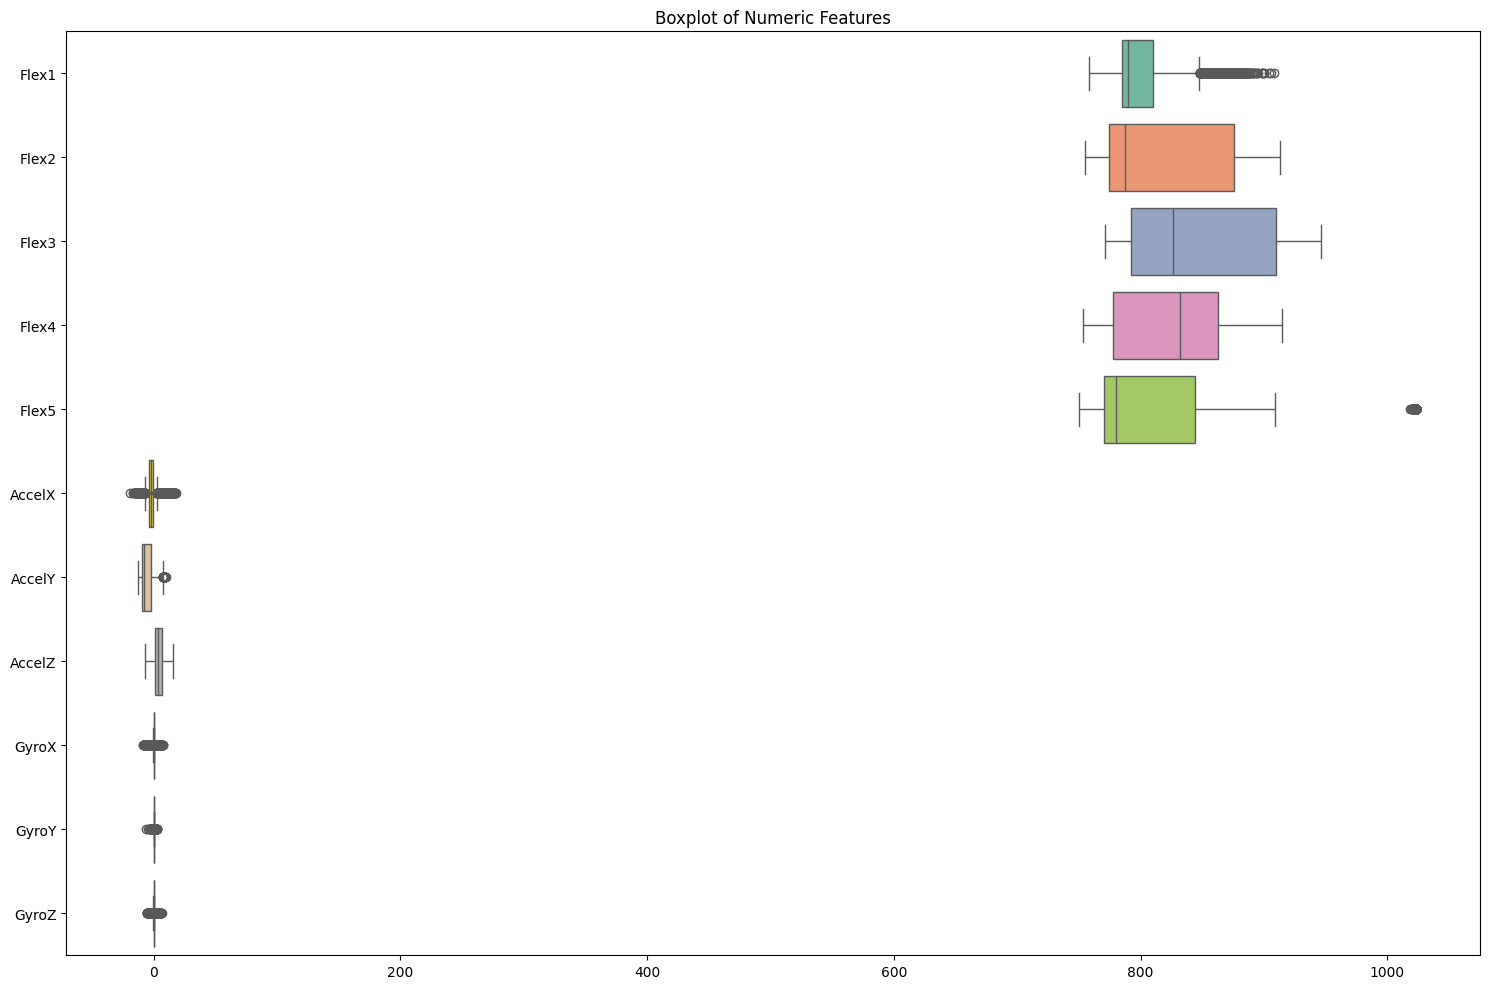

In [51]:
import seaborn as sns

# Plot box plots for each numeric feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data, orient='h', palette='Set2')
plt.title('Boxplot of Numeric Features')
plt.tight_layout()
plt.show()


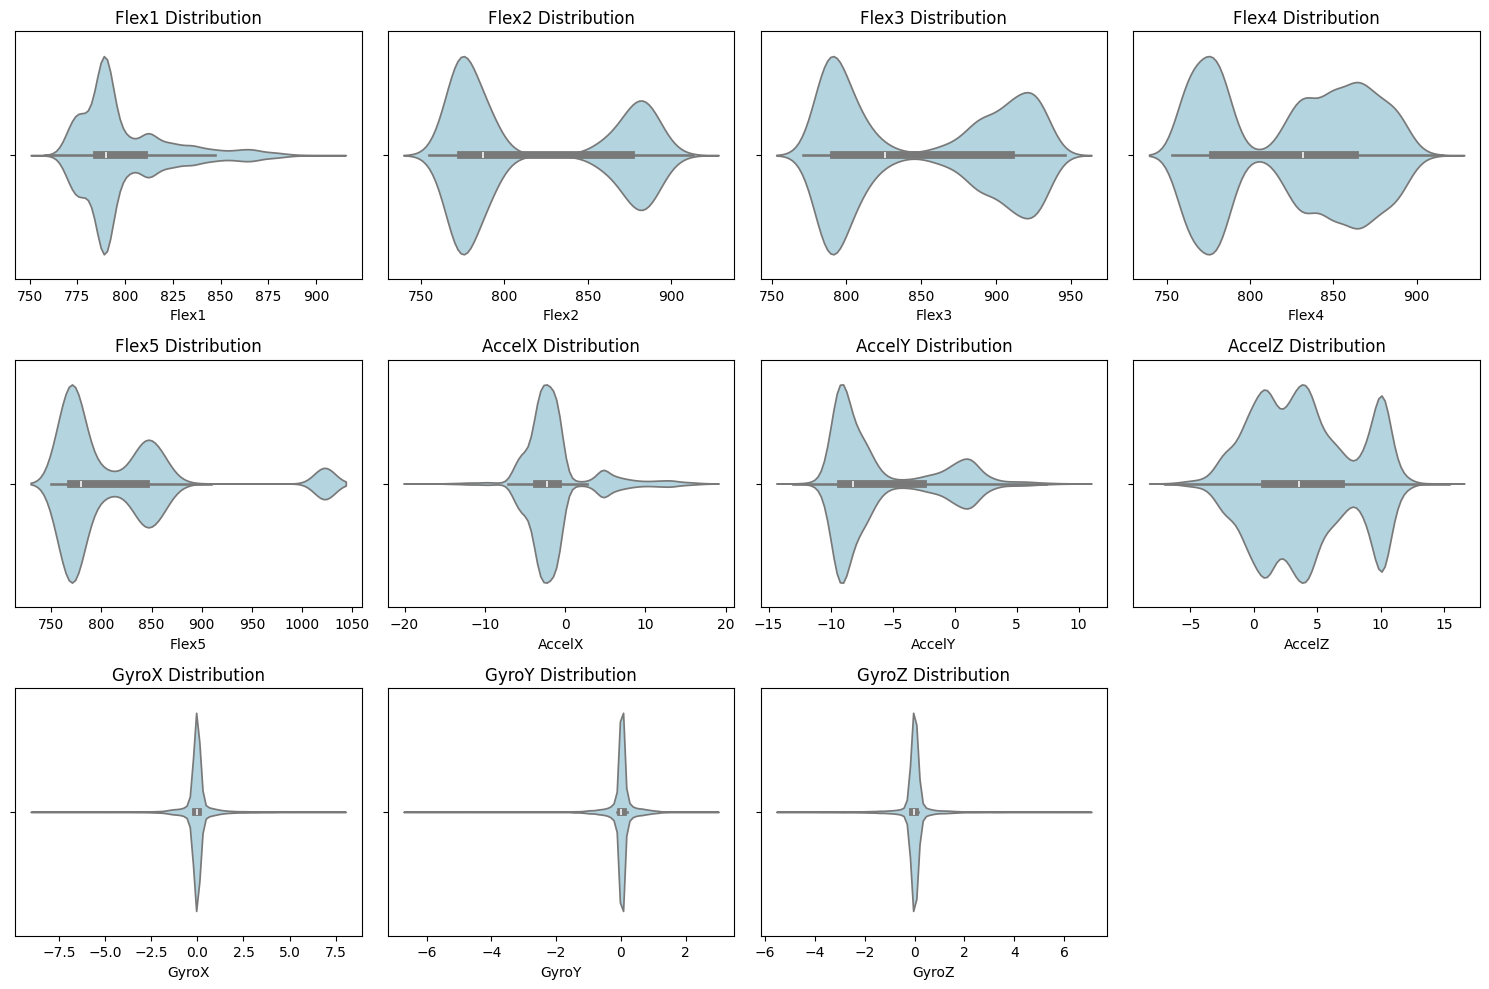

In [52]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid size based on the number of features
    sns.violinplot(x=numeric_data[column], color='lightblue')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


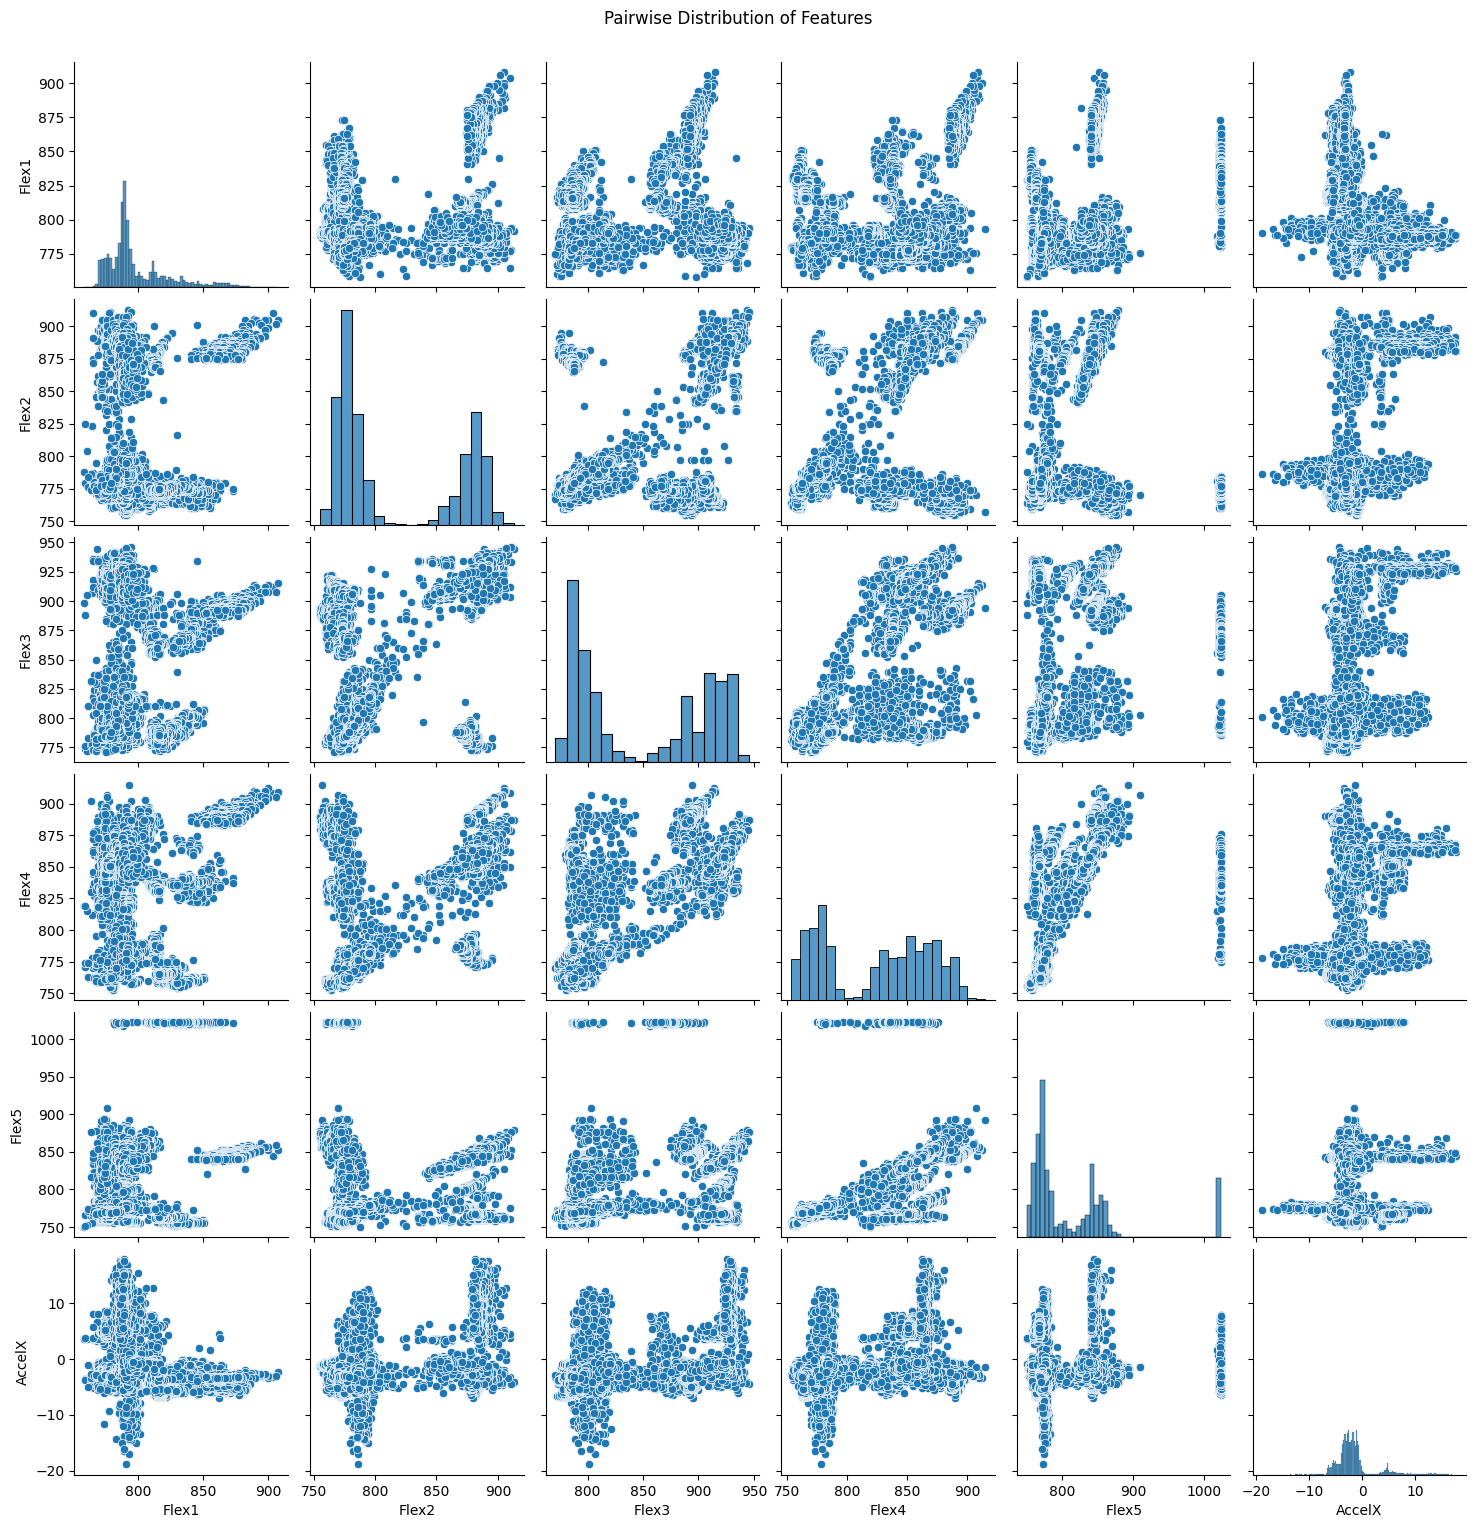

In [53]:
# If there are many features, select a subset for the pair plot
subset_data = numeric_data.iloc[:, :6]  # First 6 features, for example

sns.pairplot(subset_data)
plt.suptitle('Pairwise Distribution of Features', y=1.02)
plt.show()
